In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import numpy as np
df = np.arange(10)
df

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Project Title: Advanced Customer Churn Analysis Objective: Analyze a telecom dataset to predict customer churn and identify factors influencing customer retention. The project includes advanced data transformations, feature engineering, and modeling.

Assignment Tasks:

1. Data Loading and Initial Inspection

Load the telecom dataset into a Pandas DataFrame.

In [1]:
import pandas as pd
df=pd.read_csv(r"D:\Data-Analytics\Data\churn-bigml-80.csv")


2. Print the column names, data types, and descriptive statistics.

In [25]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [2]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [33]:
df.columns

Index(['State_Code', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'State'],
      dtype='object')

In [21]:
df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
       'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
       'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
       'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
       'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object)

In [25]:
df.rename(columns={'State':'State_Code'} , inplace=True)

In [26]:
State_map={
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'DC': 'District of Columbia'
}
df['State']=df['State_Code'].map(State_map)

In [27]:
df

,State_Code,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,Kansas
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,Ohio
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,New Jersey
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,Ohio
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,Oklahoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,...,16.12,221.4,128,9.96,11.8,5,3.19,2,False,South Carolina
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,18.32,279.1,83,12.56,9.9,6,2.67,2,False,Arizona
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False,West Virginia
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False,Rhode Island


3.Check for missing values and duplicates in the dataset.

In [29]:
df.isnull().sum()

State_Code                0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
State                     0
dtype: int64

In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [44]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
print(f"Mean of Total charge : ",df['Total day charge'].mean().round(2))


Mean of Total charge :  30.51


In [19]:
print("Median of Total Charge : ",df["Total day charge"].median())

Median of Total Charge :  30.59


In [20]:
print("Mode of Total Charge : ",df["Total day charge"].mode())

Mode of Total Charge :  0    27.59
1    31.18
Name: Total day charge, dtype: float64


In [21]:
df["Total day charge"].describe()


count    2666.000000
mean       30.512404
std         9.215733
min         0.000000
25%        24.380000
50%        30.590000
75%        36.700000
max        59.640000
Name: Total day charge, dtype: float64

In [22]:
df["Total day charge"].Range=df["Total day charge"].max()-df["Total day charge"].min()
print(f"max : ",df["Total day charge"].max())
print(f"min : ",df["Total day charge"].min())
print(f"Range :",df["Total day charge"].Range)

max :  59.64
min :  0.0
Range : 59.64


In [23]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [24]:
df.duplicated().sum()


np.int64(0)

4.Summarize the target variable (Churn) distribution.
The target variable "Churn" represents whether a customer has churned (left the service) or not. It is a categorical variable, and it typically has two values:

True/1: Indicates that the customer has churned.

False/0: Indicates that the customer has not churned.




In [27]:
df['Churn'].value_counts()

Churn
False    2278
True      388
Name: count, dtype: int64

In [28]:
df['Churn'].value_counts(normalize=True)

Churn
False    0.854464
True     0.145536
Name: proportion, dtype: float64

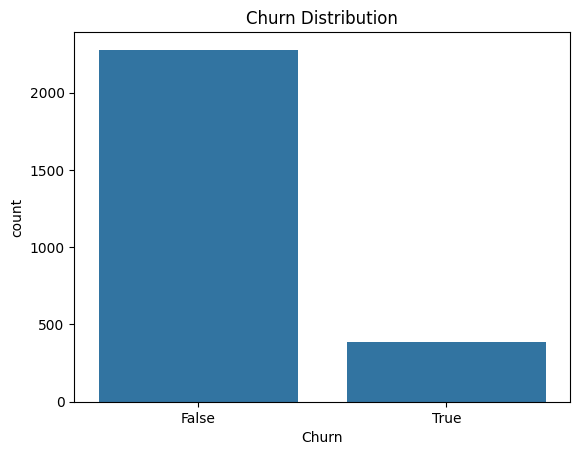

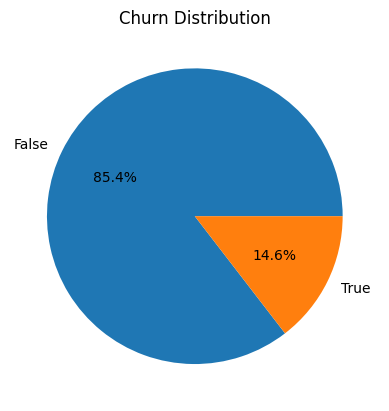

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

    # Countplot:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

    # Pie chart:
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.show()

2. Data Cleaning and Preprocessing
    1.Handle missing values:

    o	Impute numerical columns with median or mean.

    o	Impute categorical columns with the mode.

    2.Remove duplicate rows, if any.
    
    3.Convert all categorical features into numeric using one-hot encoding


3. Exploratory Data Analysis (EDA)
  1.	Plot the distribution of the following features:

      o	Tenure

      o	Monthly Charges

      o	Total Charges

  2.	Identify the top 3 features contributing to churn using visualizations.
  3.	Use box plots to compare churn vs. non-churn customers for numerical features.


In [30]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


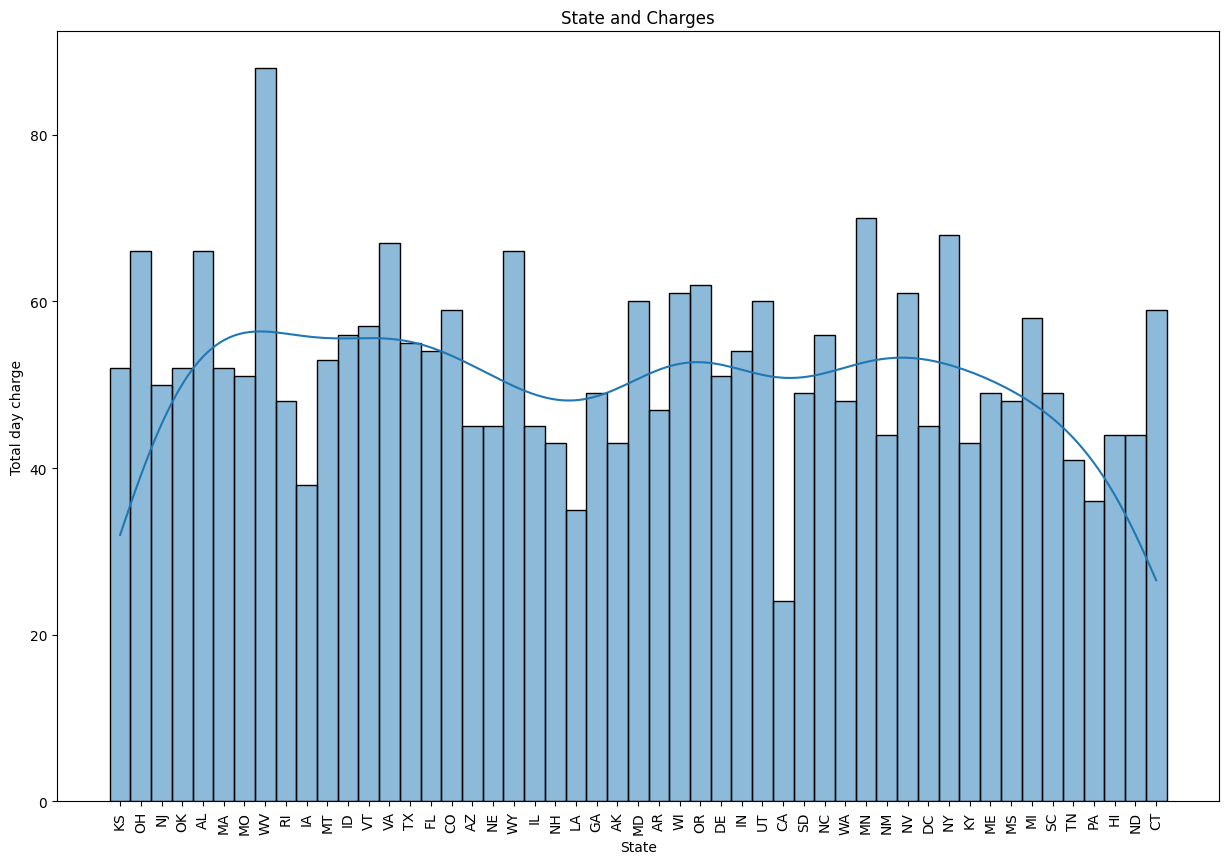

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.histplot(df['State'], kde=True)
plt.xlabel('State')
plt.ylabel('Total day charge')
plt.title('State and Charges')
plt.xticks(rotation=90)
plt.show()

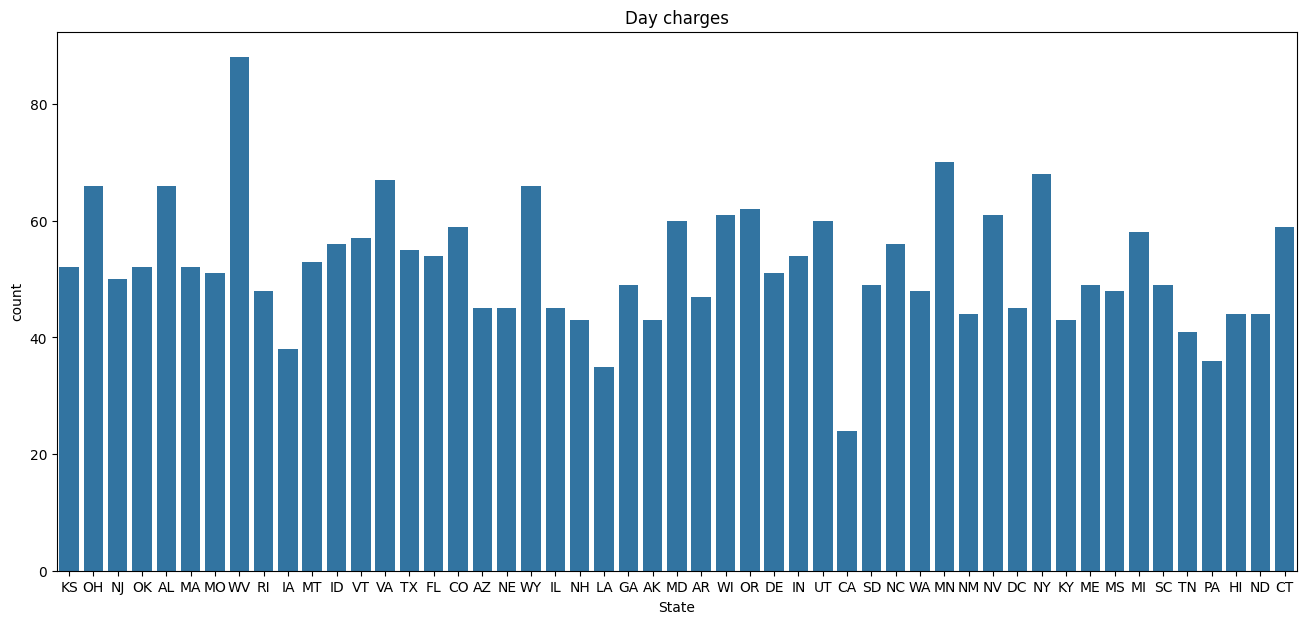

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,7))
sns.countplot(x='State' , data=df)
plt.title('Day charges')
plt.show()

In [37]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.008620,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,0.017728
Area code,-0.008620,1.000000,-0.000584,-0.023134,-0.009629,-0.023130,0.000679,-0.018602,0.000707,-0.003353,0.011455,-0.003382,-0.013418,-0.027423,-0.013534,0.034442,0.001019
Number vmail messages,-0.002996,-0.000584,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.086474
Total day minutes,0.002847,-0.023134,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.195688
Total day calls,0.038862,-0.009629,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,0.018290
Total day charge,0.002843,-0.023130,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.195689
Total eve minutes,-0.015923,0.000679,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192,0.072906
Total eve calls,0.018552,-0.018602,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058,-0.001539
Total eve charge,-0.015909,0.000707,0.011418,0.003992,-0.026006,0.004002,1.000000,-0.007642,1.000000,-0.013428,0.009030,-0.013464,-0.006923,0.002169,-0.006955,-0.013196,0.072893
Total night minutes,-0.008994,-0.003353,-0.000224,0.013491,0.008986,0.013495,-0.013414,-0.000175,-0.013428,1.000000,0.012736,0.999999,-0.008607,-0.001110,-0.008510,0.005236,0.033639


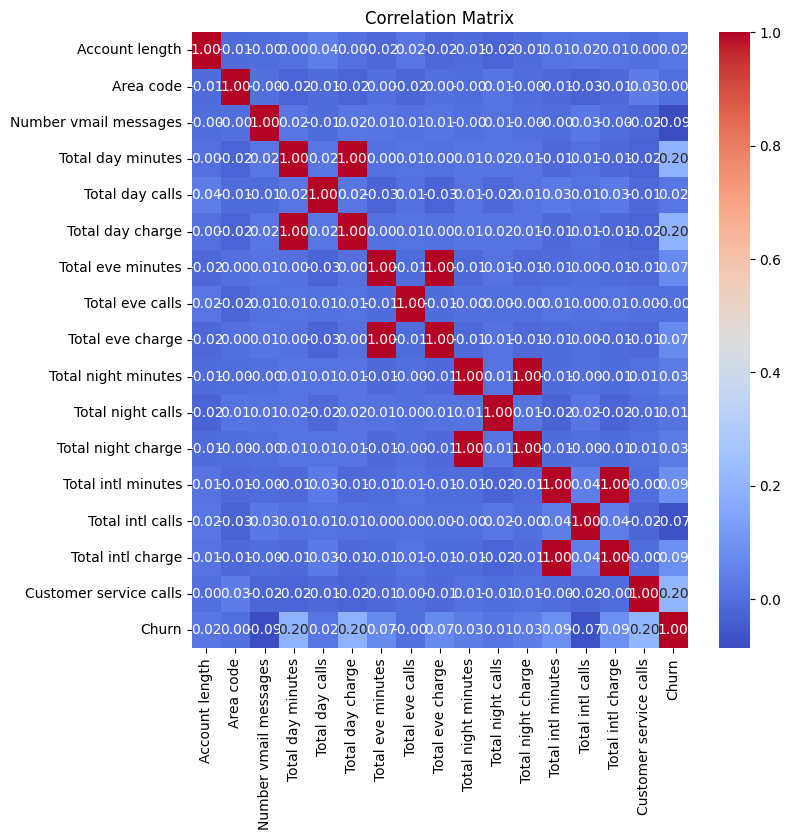

In [39]:
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

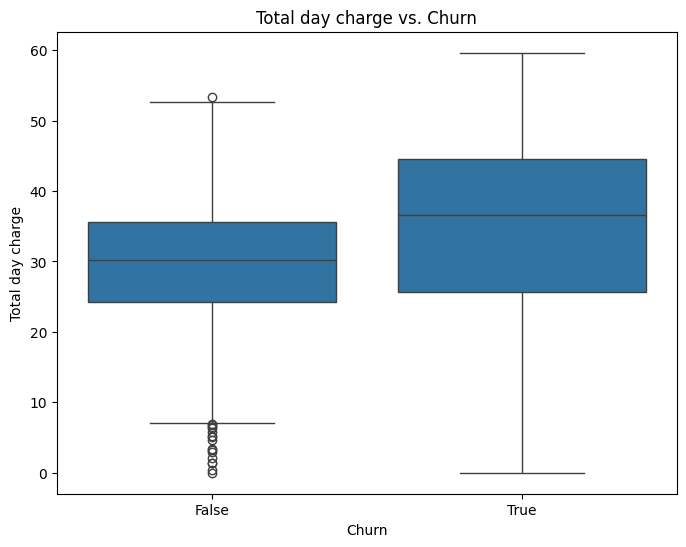

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total day charge', data=df)
plt.title('Total day charge vs. Churn')
plt.show()

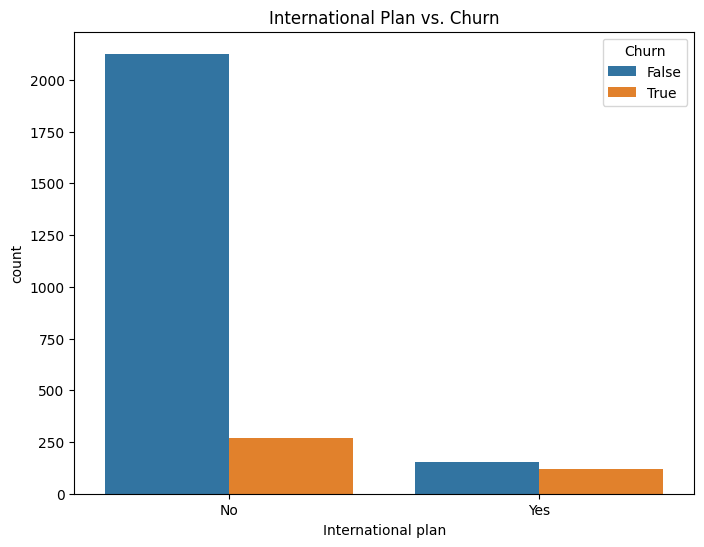

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='International plan', hue='Churn', data=df)
plt.title('International Plan vs. Churn')
plt.show()

In [42]:
df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
       'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
       'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
       'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
       'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object)

In [43]:
df.rename(columns={'State' : 'State_Code'},inplace=True)

In [44]:
state_mapping = {
    'LA': 'Louisiana', 'IN': 'Indiana', 'NY': 'New York', 'SC': 'South Carolina',
    'HI': 'Hawaii', 'AK': 'Alaska', 'MI': 'Michigan', 'ID': 'Idaho', 'VA': 'Virginia',
    'WI': 'Wisconsin', 'MN': 'Minnesota', 'VT': 'Vermont', 'MT': 'Montana', 'MA': 'Massachusetts',
    'KY': 'Kentucky', 'CO': 'Colorado', 'AZ': 'Arizona', 'CA': 'California', 'WA': 'Washington',
    'NE': 'Nebraska', 'OH': 'Ohio', 'MO': 'Missouri', 'AL': 'Alabama', 'NH': 'New Hampshire',
    'NM': 'New Mexico', 'OR': 'Oregon', 'TX': 'Texas', 'MS': 'Mississippi', 'WY': 'Wyoming',
    'FL': 'Florida', 'KS': 'Kansas', 'NC': 'North Carolina', 'SD': 'South Dakota', 'OK': 'Oklahoma',
    'CT': 'Connecticut', 'RI': 'Rhode Island', 'DE': 'Delaware', 'UT': 'Utah', 'NV': 'Nevada',
    'DC': 'District of Columbia', 'ME': 'Maine', 'IL': 'Illinois', 'NJ': 'New Jersey', 'MD': 'Maryland',
    'WV': 'West Virginia', 'PA': 'Pennsylvania', 'ND': 'North Dakota', 'AR': 'Arkansas', 'TN': 'Tennessee',
    'IA': 'Iowa', 'GA': 'Georgia'
}
df['State']=df['State_Code'].map(state_mapping)

In [45]:
df

,State_Code,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,Kansas
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,Ohio
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,New Jersey
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,Ohio
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,Oklahoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,...,16.12,221.4,128,9.96,11.8,5,3.19,2,False,South Carolina
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,18.32,279.1,83,12.56,9.9,6,2.67,2,False,Arizona
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False,West Virginia
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False,Rhode Island


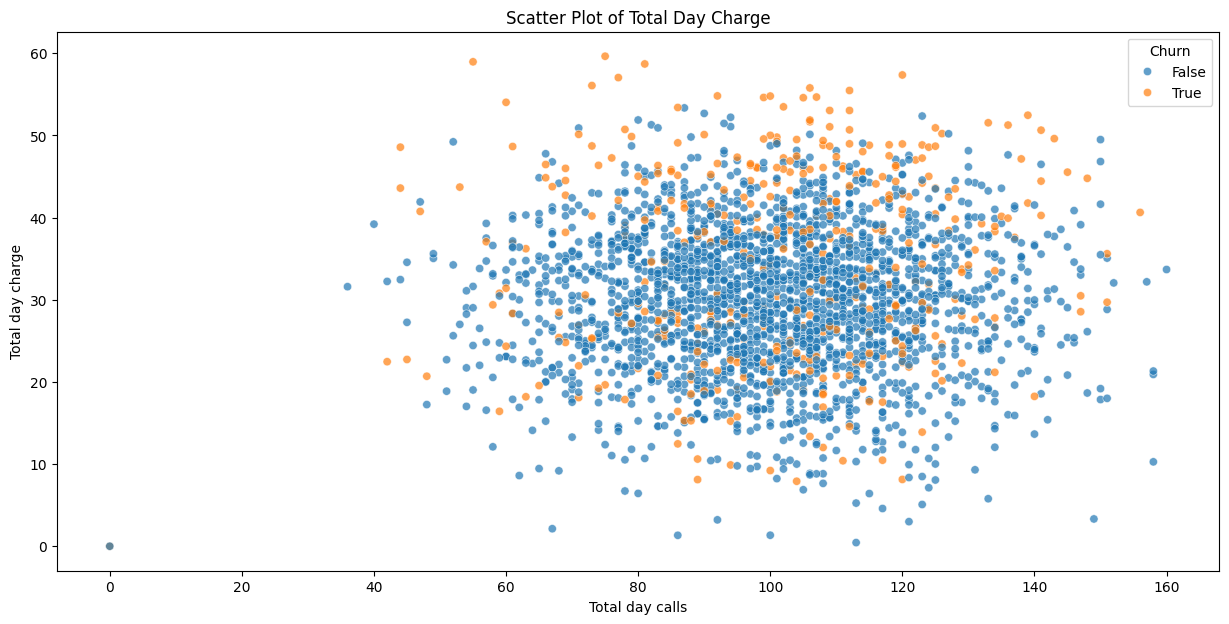

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

# Assuming 'df' is your DataFrame and 'Total day charge' is a column in it
sns.scatterplot(data=df ,x='Total day calls', y='Total day charge', color='red', alpha=0.7,hue='Churn')

plt.xlabel('Total day calls')  # You can change this if you have specific x-values
plt.ylabel('Total day charge')
plt.title('Scatter Plot of Total Day Charge')
plt.show()

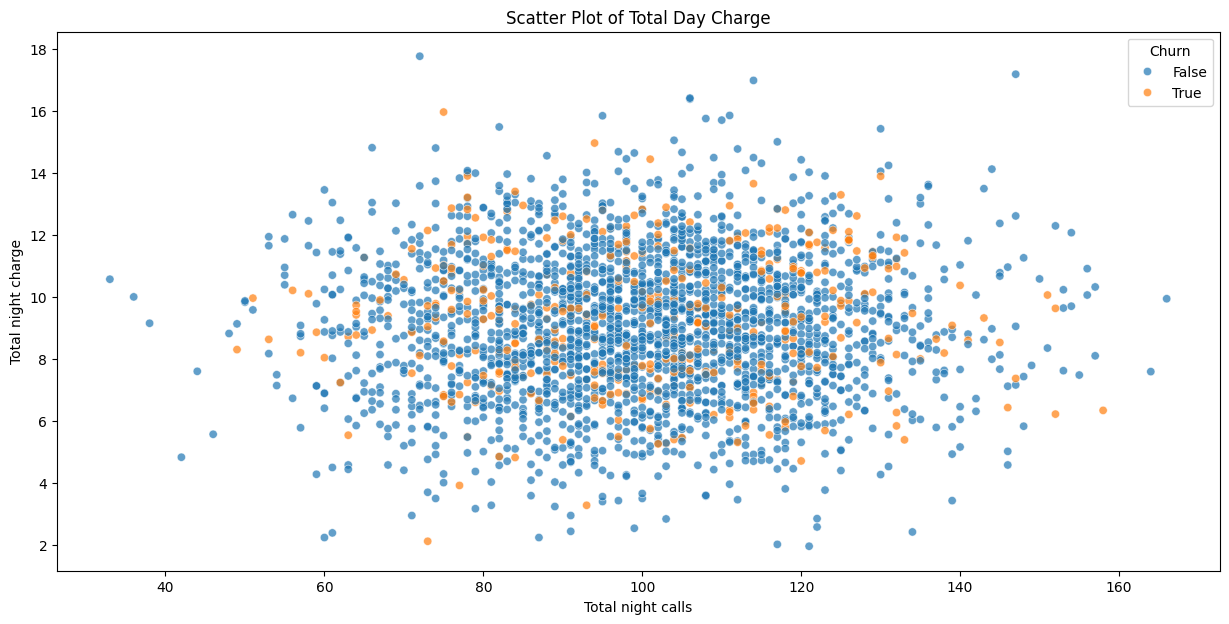

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

# Assuming 'df' is your DataFrame and 'Total day charge' is a column in it
sns.scatterplot(data=df ,x='Total night calls', y='Total night charge', color='red', alpha=0.7,hue='Churn')

plt.xlabel('Total night calls')  # You can change this if you have specific x-values
plt.ylabel('Total night charge')
plt.title('Scatter Plot of Total Day Charge')
plt.show()

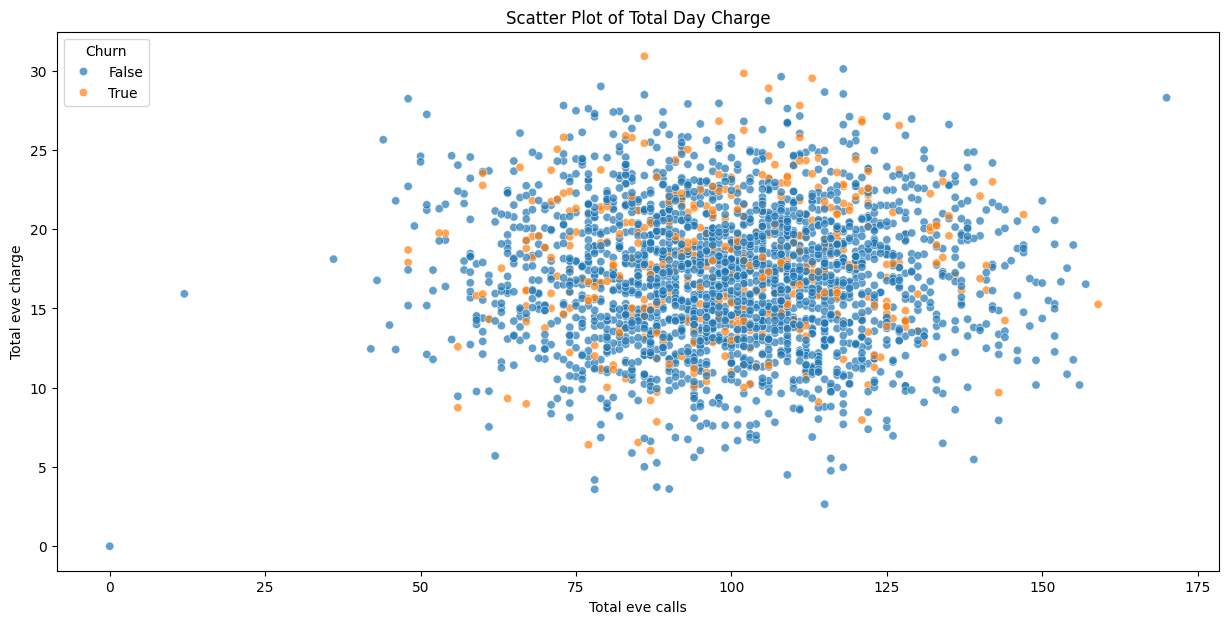

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

# Assuming 'df' is your DataFrame and 'Total day charge' is a column in it
sns.scatterplot(data=df ,x='Total eve calls', y='Total eve charge', color='red', alpha=0.7,hue='Churn')

plt.xlabel('Total eve calls')  # You can change this if you have specific x-values
plt.ylabel('Total eve charge')
plt.title('Scatter Plot of Total Day Charge')
plt.show()
